# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [4]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [5]:
df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')

In [6]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,bad


<AxesSubplot:xlabel='Risk', ylabel='count'>

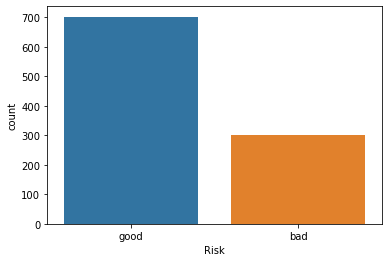

In [7]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [8]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [9]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [10]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,good
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,bad
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,good
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,good
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,bad


In [11]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

## First, we need to perform some Exploratory Data Analysis tasks, like removing null values and outliers.

In [12]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History               True
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                          True
Liable                      False
Risk                        False
dtype: bool

<b> So there are 2 columns with null values - Credit History and Job. </b>

In [13]:
df["Credit History"].unique()

array(['default', 'paid back', 'delay', nan], dtype=object)

In [14]:
df["Credit History"].isna().sum()

1

In [15]:
df["Job"].unique()

array(['skilled employee', 'unskilled/resident',
       'management/highly qualified employee', 'unemployed/non-resident',
       nan], dtype=object)

In [16]:
df["Job"].isna().sum()

1

<b> Both of these variables are categorical. Therefore, we cannot use the mean or median to fill in the missing data without converting them to numerical types beforehand. However, there is quite literally 1 row with a missing Credit History value, and 1 row with a missing Job value (this could even be the same row with both fields missing). Therefore, it makes sense to just remove the row or rows with missing values. </b>

In [17]:
df = df.dropna()
df.isnull().any()

Checking Account            False
Duration                    False
Credit History              False
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                         False
Liable                      False
Risk                        False
dtype: bool

## Next, we should look for outliers in the dataframe.

<AxesSubplot:ylabel='Duration'>

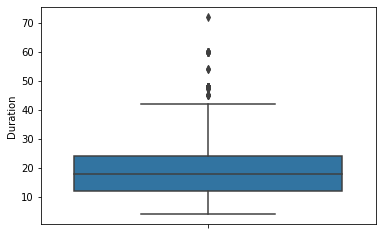

In [18]:
sns.boxplot(y=df["Duration"])

<b> I personally wouldn't consider any of the values in the box plot above to be outliers. While a duration of 70 is out of the general range of the other values for the duration, it is still a valid and therefore useful data point. Since duration is measured in months, 70 months is around 6 years, which isn't unreasonable at all. Therefore, none of these data points will be removed. </b>

<AxesSubplot:ylabel='Credit Amount'>

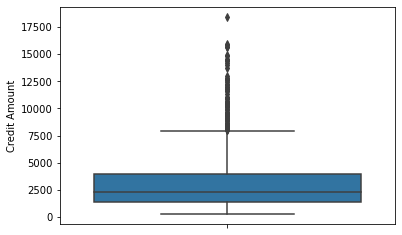

In [19]:
sns.boxplot(y=df["Credit Amount"])

<b> Again, for credit amount, none of the data points are "bad data" - that is, none of them are obviously wrong. It is entirely possible that someone has been provided with a large amount of credit - $17,500 could easily be used to purchase a car (which is one of the options under the "purpose" variable). Therefore, none of these data points will be removed. </b>

<AxesSubplot:ylabel='Installment Rate'>

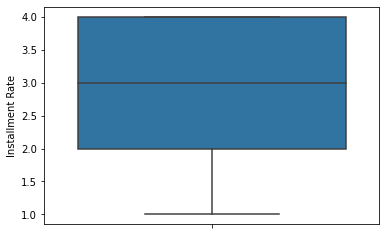

In [20]:
sns.boxplot(y=df["Installment Rate"])

<b> There are no obvious outliers in the above boxplot. </b>

<AxesSubplot:ylabel='Years in current address'>

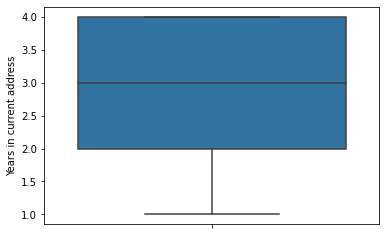

In [21]:
sns.boxplot(y=df["Years in current address"])

<b> There are no obvious outliers in the above boxplot. </b>

<AxesSubplot:ylabel='Age'>

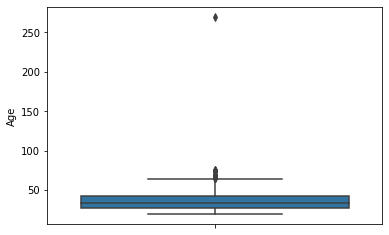

In [22]:
sns.boxplot(y=df["Age"])

<b> This is a clear outlier, since no one can be 250 years old. Therefore, this will need to be removed. Also, I believe that in class you mentioned that there was only one outlier in the dataset (and that you entered it in manually :D). This must certainly be it. </b>

In [23]:
df = df[df['Age'] <= 150]

<AxesSubplot:ylabel='Age'>

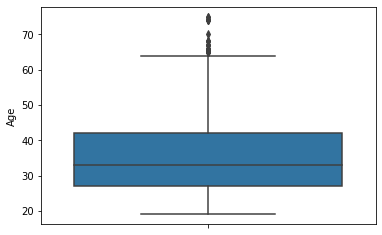

In [24]:
sns.boxplot(y=df["Age"])

<b> As you can see above, the outlier for age has been removed from the dataframe. </b>

<AxesSubplot:ylabel='Existing Credits'>

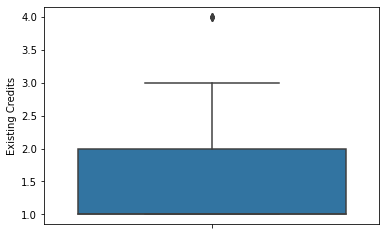

In [25]:
sns.boxplot(y=df["Existing Credits"])

<b> While it may seem like 4 is an outlier, it is not bad data - it is certainly possible for someone to have 4 existing credits with the bank. Therefore, it may be a valuable outlier and will be kept. </b>

<AxesSubplot:ylabel='Liable'>

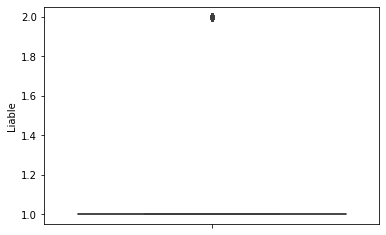

In [26]:
sns.boxplot(y=df["Liable"])

<b> Once again, it may seem like 2 is an outlier. However Liabile is defined as "Number of people being liable to provide maintenance for". 2 people is not an unreasonable number, and therefore it could be a valuable outlier and will be kept. </b>

## Now, we will normalize the numerical features in the dataframe.

<b> Data normalization is necessary, since some of the numerical features - like Credit Amount - are much larger than other numerical features - like Age. Some models aren't smart enough, and may assume that Credit Amount is a more important factor than Age since it is a bigger number. This means a small change in Credit Amount can have a bigger impact on Risk, which may not necesarily be true. </b>

In [27]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = df[['Duration', 'Credit Amount', 'Installment Rate', 'Years in current address',
                      'Age', 'Existing Credits', 'Liable']]

minMaxScaler = MinMaxScaler()
minMax_df = minMaxScaler.fit_transform(numerical_features)
minMax_df = pd.DataFrame(minMax_df, columns = ["Duration", "Credit Amount" , "Installment Rate", 
                                               "Years in current address", "Age", "Existing Credits", "Liable"])

minMax_df.head()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0


## Next, we should create dummy variables for all of the categorical variables in the dataset. 

In [28]:
risk_column = df["Risk"]

checking_account_dummy = pd.get_dummies(df['Checking Account'], drop_first=True)
credit_history_dummy = pd.get_dummies(df['Credit History'], drop_first=True)
purpose_dummy = pd.get_dummies(df['Purpose'], drop_first=True)
saving_account_dummy = pd.get_dummies(df['Saving Account'], drop_first=True)
employment_status_dummy = pd.get_dummies(df['Employment Status'], drop_first=True)
personal_status_dummy = pd.get_dummies(df['Personal Status'], drop_first=True)
guarantors_dummy = pd.get_dummies(df['Guarantors'], drop_first=True)
property_dummy = pd.get_dummies(df['Property'], drop_first=True)
installment_plans_dummy = pd.get_dummies(df['Installment plans'], drop_first=True)
housing_dummy = pd.get_dummies(df['Housing'], drop_first=True)
job_dummy = pd.get_dummies(df['Job'], drop_first=True)

In [29]:
# Rename columns for each dummy variable. 
checking_account_dummy.columns = ['checking_account_little', 'checking_account_moderate', 'checking_account_rich']
credit_history_dummy.columns = ['credit_history_delay', 'credit_history_paid_back']
property_dummy.columns = ['property_life_insurance', 'property_no_property', 'property_real_estate']
installment_plans_dummy.columns = ['installment_plans_none', 'installment_plans_stores']
guarantors_dummy.columns = ['guarantor_guarantor', 'guarantor_none']
housing_dummy.columns = ['housing_own', 'housing_rent']
job_dummy.columns = ['job_skilled_employee', 'job_unemployed/non_resident', 'job_unskilled/resident']

purpose_dummy.columns = ['purpose_car', 'purpose_domestic_appliances', 'purpose_education', 
                         'purpose_furniture/equipment', 'purpose_others', 'purpose_radio/television', 
                         'purpose_repairs', 'purpose_retraining']

saving_account_dummy.columns = ['savings_account_moderate', 'savings_account_quite_rich', 'savings_account_rich', 
                                'savings_account_unknown']

employment_status_dummy.columns = ['employment_status_4 to <7 years', 'employment_status_< 1 year', 
                                   'employment_status_>= 7 years', 'employment_status_unemployed']

personal_status_dummy.columns = ['personal_status_male_divorced/separated', 'personal_status_male_married/widowed', 
                                 'personal_status_male_single']

In [30]:
# Create a dataframe containing all of the dummy variables. 
dummy_df = pd.concat([checking_account_dummy, credit_history_dummy, purpose_dummy,
                saving_account_dummy, employment_status_dummy, personal_status_dummy, guarantors_dummy,
                property_dummy, installment_plans_dummy, housing_dummy, job_dummy], axis=1)

# Reset the indexes for each dataframe so they can be combined without introducing null values.
dummy_df.index = minMax_df.index
risk_column.index = minMax_df.index

# Concat the two dataframes together.
df = pd.concat([minMax_df, dummy_df], axis=1)

# 0 is low risk, 1 is high risk.
df['Risk'] = risk_column.apply(lambda x: 0 if x == 'good' else 1)

In [31]:
df.columns

Index(['Duration', 'Credit Amount', 'Installment Rate',
       'Years in current address', 'Age', 'Existing Credits', 'Liable',
       'checking_account_little', 'checking_account_moderate',
       'checking_account_rich', 'credit_history_delay',
       'credit_history_paid_back', 'purpose_car',
       'purpose_domestic_appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_others',
       'purpose_radio/television', 'purpose_repairs', 'purpose_retraining',
       'savings_account_moderate', 'savings_account_quite_rich',
       'savings_account_rich', 'savings_account_unknown',
       'employment_status_4 to <7 years', 'employment_status_< 1 year',
       'employment_status_>= 7 years', 'employment_status_unemployed',
       'personal_status_male_divorced/separated',
       'personal_status_male_married/widowed', 'personal_status_male_single',
       'guarantor_guarantor', 'guarantor_none', 'property_life_insurance',
       'property_no_property', 'property_re

In [32]:
# Ensure that combining the dataframes didn't introduce any null values. 
df.isnull().any()

Duration                                   False
Credit Amount                              False
Installment Rate                           False
Years in current address                   False
Age                                        False
Existing Credits                           False
Liable                                     False
checking_account_little                    False
checking_account_moderate                  False
checking_account_rich                      False
credit_history_delay                       False
credit_history_paid_back                   False
purpose_car                                False
purpose_domestic_appliances                False
purpose_education                          False
purpose_furniture/equipment                False
purpose_others                             False
purpose_radio/television                   False
purpose_repairs                            False
purpose_retraining                         False
savings_account_mode

## Now, we should perform some basic exploration of the data. More specifically, we should check to see which features have the highest influence on the Risk value (since we are building our models to evaluate a person's credit risk).

In [33]:
df.corrwith(df["Risk"]).sort_values()

housing_own                               -0.134589
savings_account_unknown                   -0.129238
property_real_estate                      -0.119300
installment_plans_none                    -0.113285
purpose_radio/television                  -0.106922
Age                                       -0.091127
savings_account_rich                      -0.085749
personal_status_male_single               -0.080677
employment_status_4 to <7 years           -0.075980
savings_account_quite_rich                -0.070954
employment_status_>= 7 years              -0.059733
guarantor_guarantor                       -0.055039
Existing Credits                          -0.045732
checking_account_rich                     -0.044009
purpose_retraining                        -0.039281
job_unskilled/resident                    -0.021822
personal_status_male_married/widowed      -0.019630
job_skilled_employee                      -0.013559
Liable                                    -0.003015
guarantor_no

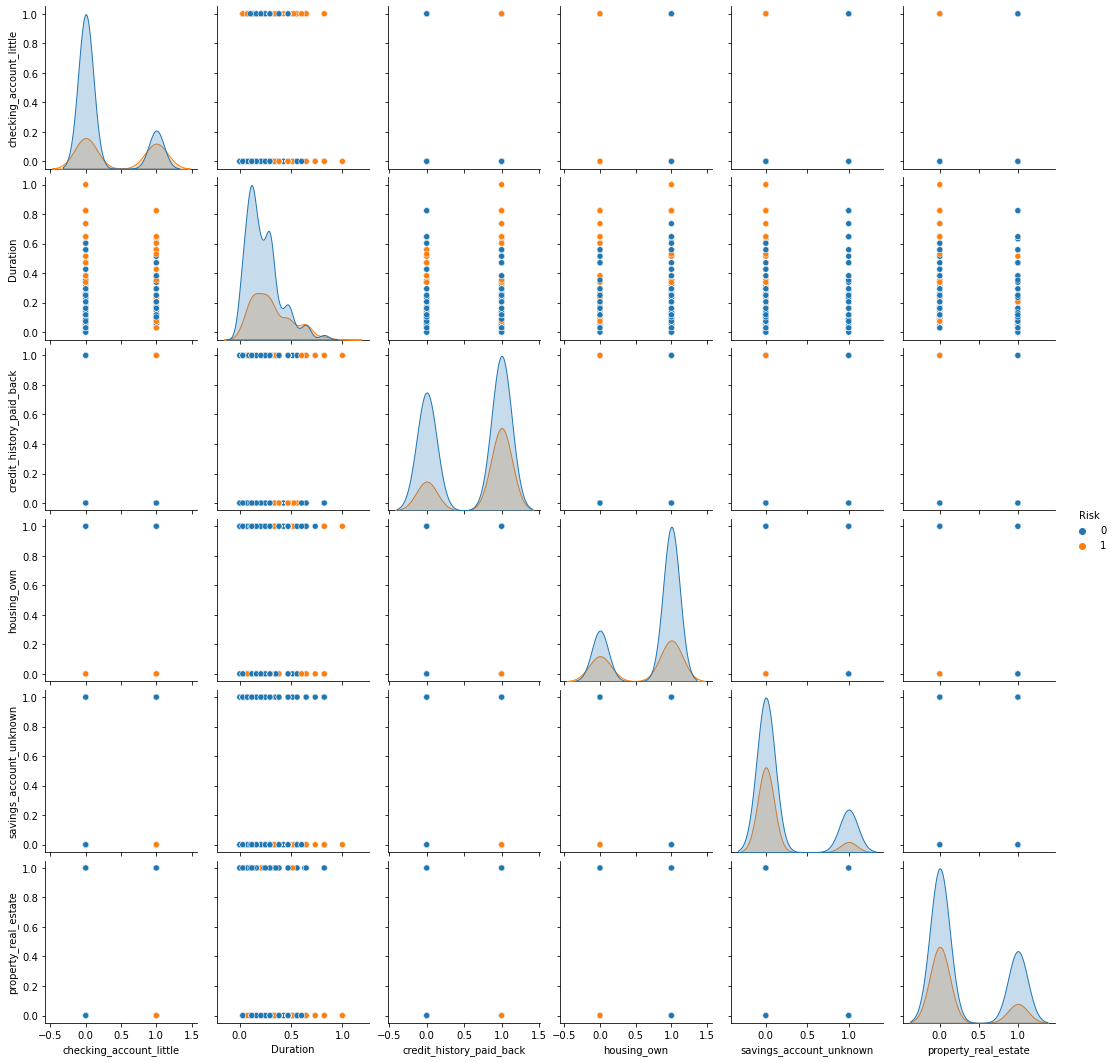

In [34]:
# This is a pairplot of the features with the highest positive and negative correlation with Risk.

df_plot = df[['checking_account_little', 'Duration', 'credit_history_paid_back', 'housing_own',
              'savings_account_unknown', 'property_real_estate', 'Risk']]

sns.pairplot(df_plot, hue='Risk')

## Building a Logistic Regression Model (With Credit History) 

<b> Since we only need to include most of the features in our models (and not all of them to avoid overfitting the models), I will build my models using features that have a high correlation (negative or positive) with Risk. Additionally, for my first 2 models, I will be sure to include the "Credit History" features since we have to evaluate whether it is important in the classification. 
</b>

<b> The following features were omitted from the models due to having an extremely low correlation with risk (I could have removed more, but I also wanted to include enough features in the model to get an accurate result): 
   
| Feature Omitted                         	| Correlation with Risk 	|
|-----------------------------------------	|-----------------------	|
| job_unskilled/resident                  	| -0.021822             	|
| personal_status_male_married/widowed    	| -0.019630             	|
| job_skilled_employee                    	| -0.013559             	|
| Liable                                  	| -0.003015             	|
| guarantor_none                          	| -0.000751             	|
| Years in current address                	| 0.002967              	|
| job_unemployed/non_resident             	| 0.005951              	|
| property_life_insurance                 	| 0.007238              	|
| purpose_domestic_appliances             	| 0.008016              	|
| purpose_repairs                         	| 0.020828              	|
| purpose_furniture/equipment             	| 0.020971              	|
| savings_account_moderate                	| 0.022255              	|
| purpose_car                             	| 0.022621              	|
| purpose_others                          	| 0.028058              	|
| employment_status_>= 7 years            	| -0.059733             	|
| guarantor_guarantor                     	| -0.055039             	|
| Existing Credits                        	| -0.045732             	|
| checking_account_rich                   	| -0.044009             	|
| purpose_retraining                      	| -0.039281             	|
| employment_status_unemployed            	| 0.039815              	|
| personal_status_male_divorced/separated 	| 0.050063              	|
| installment_plans_stores                	| 0.050523              	|

In [35]:
XArray = df[['Duration', 'Credit Amount', 'Installment Rate', 'Age', 'checking_account_little',
             'checking_account_moderate', 'credit_history_delay', 'credit_history_paid_back', 
             'purpose_education', 'purpose_radio/television', 'savings_account_quite_rich',
             'savings_account_rich', 'savings_account_unknown', 'employment_status_4 to <7 years', 
             'employment_status_< 1 year', 'personal_status_male_single', 'property_no_property',
             'property_real_estate', 'installment_plans_none', 'housing_own', 'housing_rent']].values

YArray = df["Risk"].values

X = XArray.reshape(-1, 21)
Y = YArray.reshape(-1, 1)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       142
           1       0.59      0.47      0.52        58

    accuracy                           0.75       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.74      0.75      0.74       200

Accuracy Score: 0.75


<b> This Logistic Regression model is pretty good! The overall accuracy score is great - at 0.75.

However, it is important to remember that with these models, we are more interested in the "1" case, where the model can successfuly identify that someone will be a bad credit risk. It seems that the model is much better at predicting the "0" case, or when someone will be a good credit risk. The precision, recall, and f1-score for the "1" case are all significantly lower than the "0" case. 
    
Despite this, the model still performs decently in the "1" case, since the precision and recall are still high (both values are close to 0.6, which as you stated in class, is good). </b> 

## Cross Validation of Logistic Regression Model (With Credit History)

In [37]:
import random

accuracy = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))

<AxesSubplot:xlabel='trial'>

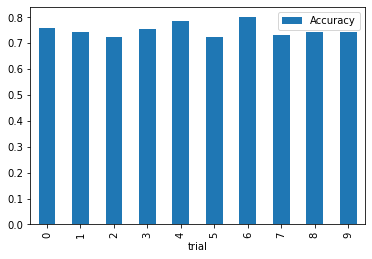

In [38]:
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

In [39]:
print(rdf['Accuracy'].mean())

0.7515000000000001


<b> We can see that this model passes the cross validation - the accuracy stays consistent between trials all 10 trials, generally falling between 0.7 to 0.8. The average accuracy is also great. </b>

## Building a Decision Tree Model (With Credit History) 

In [40]:
model = DecisionTreeClassifier(max_depth=4, criterion="gini")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       137
           1       0.70      0.30      0.42        63

    accuracy                           0.74       200
   macro avg       0.72      0.62      0.63       200
weighted avg       0.73      0.74      0.70       200

Accuracy: 0.74
Confusion Matrix: [[129   8]
 [ 44  19]]


<b> This Decision Tree model is also great, with an overall accuracy of 0.74. One significant difference between the Logistic Regression model and this model is that the precision value for the "1" case is much higher with this Decision Tree model (from 0.59 with the Logistic Regression model to 0.70 with this Decision Tree model). However, this much higher precision comes at the expense of recall, which is much lower than the previous Logistic Regression model (from 0.47 in the Logistic Regression model to 0.30 in this Decision Tree model).

Additionally, when looking at the Confusion Matrix, you can see that the number of True Positive and True Negative cases far outpaces the False Positive and False Negative cases, meaning that the majority of the time, the model guesses correctly. 

A visualization of this Decision Tree is below. </b>

[Text(685.0446428571428, 978.48, 'X[4] <= 0.5\ngini = 0.417\nsamples = 800\nvalue = [563, 237]'),
 Text(373.6607142857143, 761.0400000000001, 'X[5] <= 0.5\ngini = 0.349\nsamples = 581\nvalue = [450, 131]'),
 Text(199.28571428571428, 543.6, 'X[18] <= 0.5\ngini = 0.226\nsamples = 369\nvalue = [321, 48]'),
 Text(99.64285714285714, 326.1600000000001, 'X[2] <= 0.167\ngini = 0.414\nsamples = 58\nvalue = [41, 17]'),
 Text(49.82142857142857, 108.72000000000003, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(149.46428571428572, 108.72000000000003, 'gini = 0.449\nsamples = 50\nvalue = [33, 17]'),
 Text(298.92857142857144, 326.1600000000001, 'X[3] <= 0.205\ngini = 0.179\nsamples = 311\nvalue = [280, 31]'),
 Text(249.10714285714283, 108.72000000000003, 'gini = 0.293\nsamples = 118\nvalue = [97, 21]'),
 Text(348.75, 108.72000000000003, 'gini = 0.098\nsamples = 193\nvalue = [183, 10]'),
 Text(548.0357142857142, 543.6, 'X[1] <= 0.663\ngini = 0.476\nsamples = 212\nvalue = [129, 83]'),
 Text(498.214

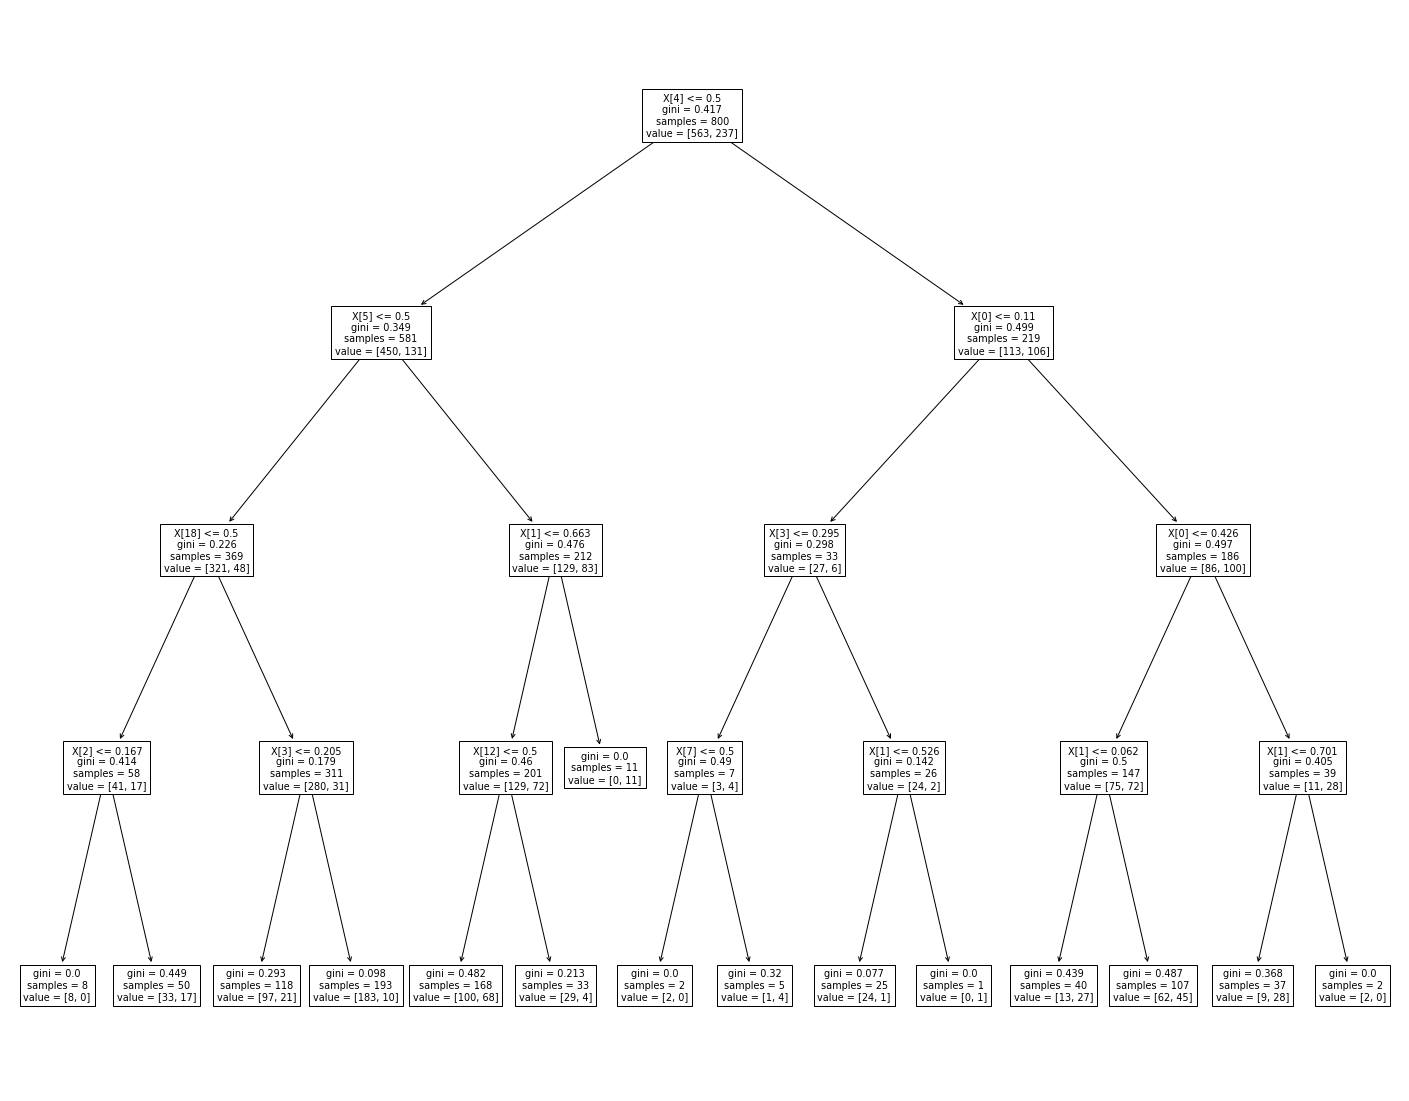

In [41]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model)

## Cross Validation of Decision Tree Model (With Credit History)

In [42]:
accuracy = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier(max_depth=4, criterion="gini")
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))

<AxesSubplot:xlabel='trial'>

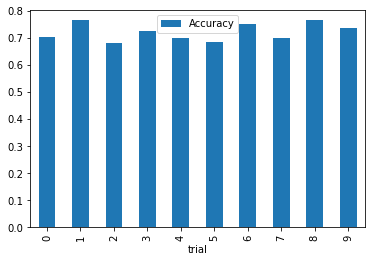

In [43]:
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

In [44]:
print(rdf['Accuracy'].mean())

0.721


<b> This model passes cross validation - the accuracy scores stay generally consistent in each trial, landing somewhere above 0.7 but less than 0.8. </b>

## Building a Logistic Regression Model (Without Credit History) 

<b> In order to remove the Credit History feature, we must remove 2 columns from the XArray (since Credit History was turned into a dummy variable) - "credit_history_delay" and "credit_history_paid_back". </b>

In [45]:
XArray = df[['Duration', 'Credit Amount', 'Installment Rate', 'Age', 'checking_account_little',
             'checking_account_moderate', 'purpose_education', 'purpose_radio/television', 
             'savings_account_quite_rich', 'savings_account_rich', 'savings_account_unknown', 
             'employment_status_4 to <7 years', 'employment_status_< 1 year', 
             'personal_status_male_single', 'property_no_property', 'property_real_estate', 
             'installment_plans_none', 'housing_own', 'housing_rent']].values

YArray = df["Risk"].values

X = XArray.reshape(-1, 19)
Y = YArray.reshape(-1, 1)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       142
           1       0.62      0.43      0.51        58

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.76      0.75       200

Accuracy Score: 0.76


<b> This Logistic Regression model without Credit History actually ended up performing better than the Logistic Regression model with Credit History! The overall accuracy rose from 0.75 to 0.76, and in the "1" case, the precision rose from 0.59 to 0.62! However, the recall dropped slightly from 0.47 to 0.43, and the f1-score dropped from 0.52 to 0.51. Essentially, there are some tradeoffs made with both models, but the model without Credit History has the higher accuracy.

Now we will perform cross validation to verify these results. </b>

## Cross Validation of Logistic Regression Model (Without Credit History)

In [47]:
import random

accuracy = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))

<AxesSubplot:xlabel='trial'>

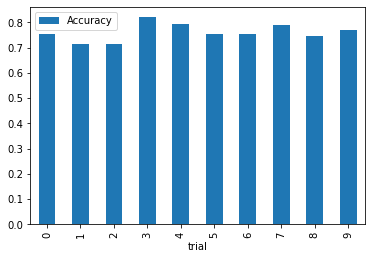

In [48]:
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

In [49]:
print(rdf['Accuracy'].mean())

0.7615000000000001


<b> We can clearly see that this model passes cross validation, as the accuracy stays consistent between trials - generally between 0.7 and 0.8. 
    
Additionally, the average accuracy of these models without Credit History is higher than the average accuracy of the models with Credit History (0.7515 with Credit History vs. 0.7615 without Credit History). This validates our earlier result above, showing that at least for Logistic Regression, removing Credit History slightly improves the accuracy of the model. </b>

## Building a Decision Tree Model (Without Credit History) 

In [50]:
model = DecisionTreeClassifier(max_depth=4, criterion="gini")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       145
           1       0.43      0.29      0.35        55

    accuracy                           0.70       200
   macro avg       0.60      0.57      0.58       200
weighted avg       0.67      0.70      0.68       200

Accuracy: 0.7
Confusion Matrix: [[124  21]
 [ 39  16]]


<b> This Decision Tree model without Credit History performs more poorly when compared to the Decision Tree model with Credit History. The overall accuracy decreased from 0.74 to 0.70, the precision in the "1" case drastically dropped from 0.70 to 0.43, and the f1-score in the "1" case dropped from 0.42 to 0.35. Essentially, this model performed worse in predicting someone's bad credit risk in almost every way when compared to the Decision Tree with Credit History. 

A visualization of this Decision Tree model is below. </b> 

[Text(709.9553571428571, 978.48, 'X[4] <= 0.5\ngini = 0.425\nsamples = 800\nvalue = [555, 245]'),
 Text(398.57142857142856, 761.0400000000001, 'X[5] <= 0.5\ngini = 0.355\nsamples = 577\nvalue = [444, 133]'),
 Text(199.28571428571428, 543.6, 'X[16] <= 0.5\ngini = 0.233\nsamples = 356\nvalue = [308, 48]'),
 Text(99.64285714285714, 326.1600000000001, 'X[3] <= 0.438\ngini = 0.433\nsamples = 63\nvalue = [43, 20]'),
 Text(49.82142857142857, 108.72000000000003, 'gini = 0.482\nsamples = 47\nvalue = [28, 19]'),
 Text(149.46428571428572, 108.72000000000003, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(298.92857142857144, 326.1600000000001, 'X[3] <= 0.205\ngini = 0.173\nsamples = 293\nvalue = [265, 28]'),
 Text(249.10714285714283, 108.72000000000003, 'gini = 0.284\nsamples = 99\nvalue = [82, 17]'),
 Text(348.75, 108.72000000000003, 'gini = 0.107\nsamples = 194\nvalue = [183, 11]'),
 Text(597.8571428571429, 543.6, 'X[1] <= 0.5\ngini = 0.473\nsamples = 221\nvalue = [136, 85]'),
 Text(498.2

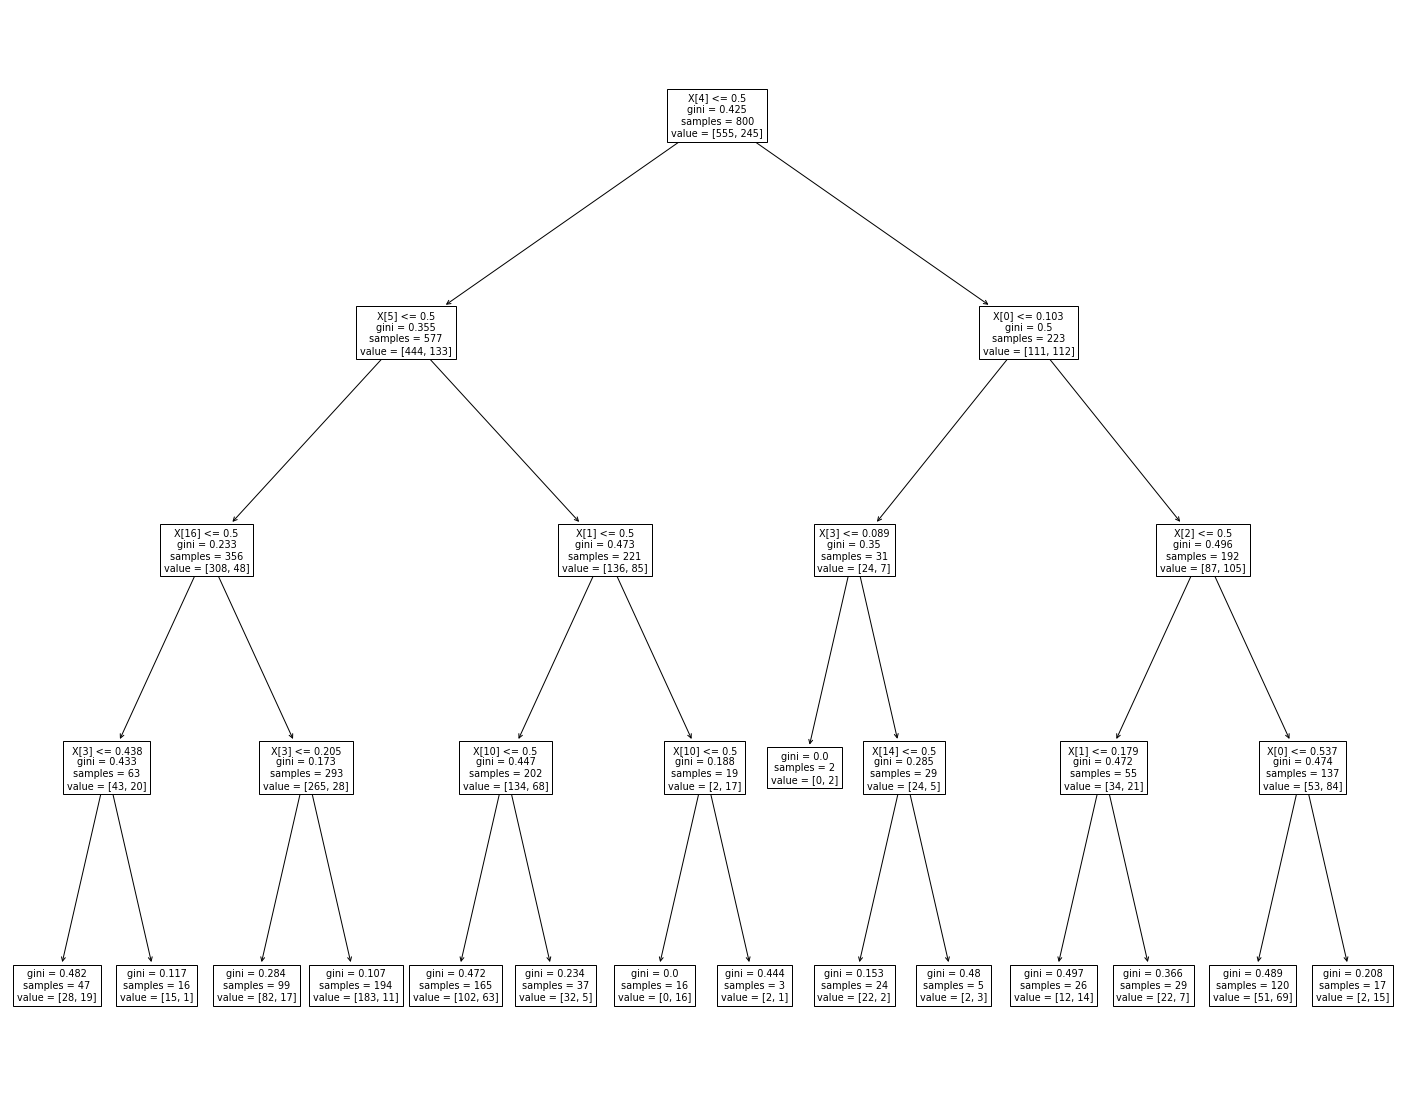

In [51]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model)

## Cross Validation of Decision Tree Model (With Credit History)

In [52]:
accuracy = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier(max_depth=4, criterion="gini")
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))

<AxesSubplot:xlabel='trial'>

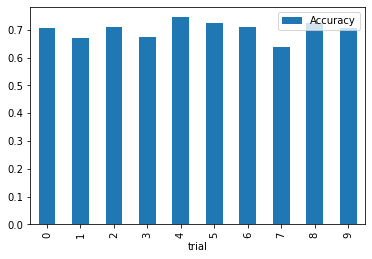

In [53]:
rdf = pd.DataFrame( {'trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trial', y='Accuracy')

In [54]:
print(rdf['Accuracy'].mean())

0.7009999999999998


<b> We can see that this Decision Tree model does pass cross validation, since the accuracy stays consistent between trials, generally being somewhere above 0.7 but below 0.8. Not only that, but we can verify that on average, the Decision Tree models with Credit History have a higher accuracy than those that do not have Credit History (0.721 with Credit History vs. 0.7009999999999998 without Credit History). This validates our results above where we just tested this with one model. </b>

## Conclusion - Does Credit History Matter?

<b> The feature Credit History does matter in classifying whether someone has a bad or good credit risk for a loan. 
    
With the Logistic Regression model, we actually saw the overall accuracy increase with the omission of Credit History in the model. However, there were some tradeoffs, since the recall for the "1" case in the model with Credit History was 0.47, while the model with no Credit History had a recall of 0.43 (a decrease of 0.04). Additionally, the f1-score for the "1" case decreased by 0.01 when excluding Credit History. Essentially, while the overall accuracy of the Logistic Regression model without Credit History did increase when compared to the Logistic Regression model with Credit History, it was at the detriment of other performance metrics. Either way, the feature Credit History did have a measurable impact on the performance of the Logistic Regression models (whether the metrics went up or down still shows that Credit History matters in some way).
    
<br>
    
We actually saw the opposite situation with the Decision Trees, where we saw a decrease in the overall accuracy with the omission of Credit History. The decrease in precision was perhaps the most striking performance metric - the model with Credit History had a precision of 0.70 in the "1" case, while the model without Credit History had a precision of 0.43 in the "1" case. In fact, the Decision Tree without Credit History was almost worse in every way than the Decision Tree with Credit History in terms of performance metrics. Since the only difference between the 2 models was the removal of Credit History, we can conclude that Credit History also had a measurable impact on the performance of the Decision Tree models.
    
The best model that did not include Credit History was my Logistic Regression model, since the performance metrics were generally all higher than the Decision Tree model without Credit History. In fact, the Logistic Regression model without Credit History was my best performing model in general! </b>